In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=F05XORVR51J99MYRZD8PWAF1HNAS9H
%env CLEARML_API_SECRET_KEY=v8YQIVFK4LnlZf0R6oac1TpAcvse9Q2wy67JGB6gEe7EPlEHYPzX9lvxvnSkfTrBuhQ

env: CLEARML_WEB_HOST=https://app.clear.ml/
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=F05XORVR51J99MYRZD8PWAF1HNAS9H
env: CLEARML_API_SECRET_KEY=v8YQIVFK4LnlZf0R6oac1TpAcvse9Q2wy67JGB6gEe7EPlEHYPzX9lvxvnSkfTrBuhQ


In [ ]:
# ======================================================
# 步骤 1: 初始化与训练配置 (Training Configuration)
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from clearml import Task, Dataset
import joblib

# ---- 1. Определение конфигурации тренировки ----
#Здесь вы можете изменить model_type, чтобы переключить модель：'DecisionTree', 'RandomForest', 'LogisticRegression'
config_train = {
    # Настройка источника данных
    'data_params': {
        'dataset_id': 'bf44d63690094bbabe845f851b4dd0da',  # Сменить ID（ Введите только что сгенерированный идентификатор набора данных）
    },
    # Настройка гиперпараметров модели
    'model_params': {
        'model_type': 'RandomForest', # Сменить модель
        'max_depth': 5,                
        'n_estimators': 100,           
        'random_state': 42,
        'criterion': 'gini'
    }
}

# ---- 2. Инициализация тренировочной задачи----
# Имя задачи можно создавать динамически в зависимости от конфигурации. Здесь пока дано универсальное имя, рекомендуется менять его перед каждым запуском для удобства различия.
task_name = f"Train_{config_train['model_params']['model_type']}_v1"

task = Task.init(
    project_name="Adult-Income-Classification",
    task_name=task_name,
    task_type=Task.TaskTypes.training,
    tags=["Training", config_train['model_params']['model_type']]
)

# 连接配置
task.connect(config_train)

print(f"🚀 训练任务 '{task_name}' 初始化完成。")
print(f"🔧 当前模型配置: {config_train['model_params']}")

ClearML Task: created new task id=35cc45c5d25d4cbbb6330da0e2713936
ClearML results page: https://app.clear.ml/projects/5f6e8f0e87604053bec910beb345b850/experiments/35cc45c5d25d4cbbb6330da0e2713936/output/log
🚀 训练任务 'Train_RandomForest_v1' 初始化完成。
🔧 当前模型配置: {'model_type': 'RandomForest', 'max_depth': 10, 'n_estimators': 100, 'random_state': 42, 'criterion': 'gini'}


In [19]:
# ======================================================
# 步骤 2: 数据加载 (Load from ClearML Dataset)
# ======================================================

dataset_id = config_train['data_params']['dataset_id']
print(f"📦 正在获取 Dataset ID: {dataset_id} ...")

# 获取数据集对象
dataset = Dataset.get(dataset_id=dataset_id)

# 确保数据在本地可用（如果没下载过会自动下载）
dataset_path = dataset.get_local_copy()
print(f"✅ 数据已准备就绪，本地路径: {dataset_path}")

# 读取 CSV 文件
# 注意：文件名要和 data_prep.ipynb 里保存的一致
try:
    X_train = pd.read_csv(f"{dataset_path}/X_train.csv")
    X_test = pd.read_csv(f"{dataset_path}/X_test.csv")
    y_train = pd.read_csv(f"{dataset_path}/y_train.csv").values.ravel() # 转为一维数组
    y_test = pd.read_csv(f"{dataset_path}/y_test.csv").values.ravel()
    
    print(f"📊 数据加载成功!")
    print(f"   Train shape: {X_train.shape}")
    print(f"   Test shape:  {X_test.shape}")
except Exception as e:
    print(f"❌ 数据读取失败: {e}")
    print(f"请检查 dataset_path 下的文件: {os.listdir(dataset_path)}")

📦 正在获取 Dataset ID: bf44d63690094bbabe845f851b4dd0da ...
✅ 数据已准备就绪，本地路径: C:/Users/Administrator/.clearml/cache/storage_manager/datasets/ds_bf44d63690094bbabe845f851b4dd0da
📊 数据加载成功!
   Train shape: (39032, 14)
   Test shape:  (9758, 14)


⚙️ 正在初始化 RandomForest 模型...
🏋️ 开始训练...
🏆 训练完成!
   Accuracy: 0.8638
   ROC AUC:  0.9193
💾 模型已保存并上传: RandomForest_model.pkl


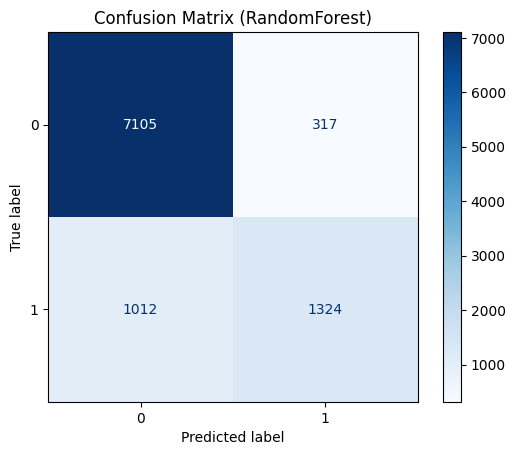

🎉 任务结束。


█████████████████████████████████ 100% | 5.37/5.37 MB [00:01<00:00,  4.60MB/s]: 
█████████████████████████████████ 100% | 5.37/5.37 MB [00:00<00:00,  5.92MB/s]: 


In [20]:
# ======================================================
# 步骤 3: 模型训练与评估 (Model Training & Evaluation)
# ======================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

# 1. 获取模型参数
params = config_train['model_params']
model_type = params['model_type']

print(f"⚙️ 正在初始化 {model_type} 模型...")

# 2. 初始化模型
if model_type == 'DecisionTree':
    model = DecisionTreeClassifier(
        max_depth=params['max_depth'],
        criterion=params['criterion'],
        random_state=params['random_state']
    )
elif model_type == 'RandomForest':
    model = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        criterion=params['criterion'],
        random_state=params['random_state']
    )
elif model_type == 'LogisticRegression':
    model = LogisticRegression(
        random_state=params['random_state'],
        max_iter=1000
    )
else:
    raise ValueError(f"未知的模型类型: {model_type}")

# 3. 训练
print("🏋️ 开始训练...")
model.fit(X_train, y_train)

# 4. 预测与评估
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0

print(f"🏆 训练完成!")
print(f"   Accuracy: {accuracy:.4f}")
print(f"   ROC AUC:  {roc_auc:.4f}")

# 5. 记录指标到 ClearML (这将显示在 Experiments 表格中)
logger = task.get_logger()
logger.report_scalar(title='Performance', series='Accuracy', value=accuracy, iteration=0)
logger.report_scalar(title='Performance', series='ROC AUC', value=roc_auc, iteration=0)

# 6. 保存并上传模型
model_filename = f"{model_type}_model.pkl"
joblib.dump(model, model_filename)
task.upload_artifact(name='Trained_Model', artifact_object=model_filename)
print(f"💾 模型已保存并上传: {model_filename}")

# 7. (可选) 绘制混淆矩阵
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title(f'Confusion Matrix ({model_type})')
plt.show()

print("🎉 任务结束。")
task.close()